## **Merry Mailers Route Optimizer**

![Screenshot 2023-12-14 at 8.11.34 AM.png](<attachment:Screenshot 2023-12-14 at 8.11.34 AM.png>)

**Background**: The holidays are quickly approaching, and santa will soon be flying around the globe delivering presents to all. To help santa get where he needs to go, Merry Mailer's resident data scientist provides high-quality route optimization to make a speedy and stress-free trip around the world.

**Purpose**: Using geo-location data, find the optimal (shortest) possible route between 9 countries.

**Data**: A dataset of longitude and latitude for each country around the world was retrieved open-source from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/alexkaechele/country-geo). The dataset contains information on country abbreviation, latitude, and longitude for 245 countries around the world. The data were explored for missing values, duplicates, and incorrect values. Only one missing value was found, and it was dropped from the data. Data were otherwise in good condition and ready for analysis.

**Approach**:  
* This problem is a take on the 'Traveling Sales Man' problem to optimize the route between multiple geo-locations.  
* Rather than brute-force solve the permutation problem, I conducted research on Python libraries built to optimize computation time.
* Concorde library in Python has been developed to optimize the route between many locations, with quick and efficient calculations.  
* Use *Haversine* distance to calculate 'as the bird flies' while taking into account the curvature of the earth.
* Choose nine countries that represent world travel: One from each continent, plus two additional.
* Nine Countries: 'United States', 'Greenland', 'Bolivia', 'Central African Republic', 'Antarctica', 'France', 'Russia', 'Australia', 'Afghanistan'

**Solution**: Use Concorde library to minimize Haversine distance between locations.

**Sections**:
1. [Import Packages and Data](#data)
2. [Prepare Data](#prepare)
3. [Data Visualizations](#visualize)
3. [Model](#model)
4. [Conclusions](#conclusions)
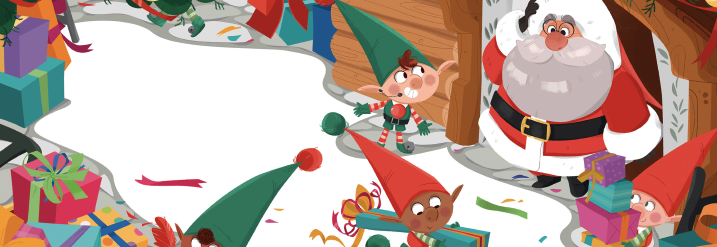

### Import Packages and Data<a id='data'></a>

In [97]:
import numpy as np
import time

import pandas as pd
from pandas.api.types import CategoricalDtype

import plotly_express as px

import random

import haversine as hs
from haversine import Unit

from concorde.problem import Problem
from concorde.concorde import Concorde

In [98]:
# Turn off pandas copy of slice of dataframe error
pd.options.mode.chained_assignment = None

In [99]:
# read in data
locations = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/country_data.csv')

In [100]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [101]:
locations.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


#### Initial Data Observations

* There are 4 features and 245 observations.  
* Each observation represents a country, and the 4 columns represent the country abbreviation, latitude, longitude, and name. 
* All data types are correct.  
* This is a mostly complete dataset, with only one missing value in country, latitude, and longitude columns.

### Prepare Data<a id='prepare'></a>

Data are checked for missing values, unknown or incorrect values, and visualized for accuracy.

##### Missing Values

In [102]:
print('Missing Values:')
locations.isna().sum()

Missing Values:


country      1
latitude     1
longitude    1
name         0
dtype: int64

There is one missing value in country, latitude, and longitude. This row will be dropped from the dataset.

In [103]:
locations.dropna(inplace=True)

locations.isna().sum()

country      0
latitude     0
longitude    0
name         0
dtype: int64

The missing value has been dropped from the dataset.

##### Check for unknown for incorrect values

In [104]:
# List all country names
print(locations['name'].unique())

['Andorra' 'United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda'
 'Anguilla' 'Albania' 'Armenia' 'Netherlands Antilles' 'Angola'
 'Antarctica' 'Argentina' 'American Samoa' 'Austria' 'Australia' 'Aruba'
 'Azerbaijan' 'Bosnia and Herzegovina' 'Barbados' 'Bangladesh' 'Belgium'
 'Burkina Faso' 'Bulgaria' 'Bahrain' 'Burundi' 'Benin' 'Bermuda' 'Brunei'
 'Bolivia' 'Brazil' 'Bahamas' 'Bhutan' 'Bouvet Island' 'Botswana'
 'Belarus' 'Belize' 'Canada' 'Cocos [Keeling] Islands' 'Congo [DRC]'
 'Central African Republic' 'Congo [Republic]' 'Switzerland'
 "Côte d'Ivoire" 'Cook Islands' 'Chile' 'Cameroon' 'China' 'Colombia'
 'Costa Rica' 'Cuba' 'Cape Verde' 'Christmas Island' 'Cyprus'
 'Czech Republic' 'Germany' 'Djibouti' 'Denmark' 'Dominica'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Estonia' 'Egypt'
 'Western Sahara' 'Eritrea' 'Spain' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands [Islas Malvinas]' 'Micronesia' 'Faroe Islands' 'France'
 'Gabon' 'United Kingdom' 'Grenada' 'Georgia' 'French Guian

All country names are correct. There are no unknown values or implicit duplicates.

In [105]:
# List all country abbreviations
locations['country'].unique()

array(['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AN', 'AO', 'AQ', 'AR',
       'AS', 'AT', 'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG',
       'BH', 'BI', 'BJ', 'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BV', 'BW',
       'BY', 'BZ', 'CA', 'CC', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL',
       'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CX', 'CY', 'CZ', 'DE', 'DJ',
       'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET',
       'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GE', 'GF',
       'GG', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT',
       'GU', 'GW', 'GY', 'GZ', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID',
       'IE', 'IL', 'IM', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM',
       'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW',
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU',
       'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MM',
       'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'M

All country abbreviations are correct. There are no unknown values or implicit duplicates.

In [106]:
# Display descriptives for latitude and longitude
locations[['latitude', 'longitude']].describe()

,latitude,longitude
count,243.000000,243.000000
mean,16.414470,13.273433
std,26.968984,74.128407
min,-75.250973,-177.156097
25%,-0.125790,-39.596106
50%,16.995971,17.873887
75%,38.966732,49.577080
max,77.553604,179.414413


* Minimum and maximum values for latitude and longitude are between -180 and 180.  
* There are no mis-entered or impossible location values.

##### Prepare Data Conclusions

* Missing values are dropped from the dataset.
* There were no incorrect, unkown, or implicit duplicate values.
* The data is ready for analysis.

### Data Visualizations<a id='visualize'></a>

##### Scatter Map

In [107]:
# Plot scatter map of all locations
map = px.scatter_geo(data_frame=locations, lat='latitude', lon='longitude', hover_data='name',
               title='Scatter Map of Countries in the Dataset')

map.update_layout(title_x=0.5)

map.show()

The geo-locations are spread across the world. Each dot represents a country. The dots in the ocean are islands. 

##### Line Map

In [108]:
# Plot line map of all locations on orthographic projection
map = px.line_geo(data_frame=locations, lat='latitude', lon='longitude', hover_data='name', 
            projection='orthographic', title='Orthographic Line Map of Countries in the Dataset')

map.update_layout(title_x=0.5)

map.show()

Experimentation with the orthographic projection and line map. Not readable as it is, but might be fun to incorporate in the final product.

##### Data Visualization Conclusions

* These visualizations show the spread of locations in the dataset across the globe.
* The maps will be used to pick nine locations that are representative of a trip around the world.

### Model<a id='model'></a>

##### Choose Nine Countries

One from each continent (7), plus Greenland and Afghanistan.

In [109]:
countries = ['United States', 'Greenland', 'Bolivia', 'Central African Republic', 'Antarctica',
             'France', 'Russia', 'Australia', 'Afghanistan']

locations_9 = locations.query('name in @countries')

locations_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2 to 227
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    9 non-null      object 
 1   latitude   9 non-null      float64
 2   longitude  9 non-null      float64
 3   name       9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes


This dataset is subset to only the nine chosen.

In [110]:
locations_9.reset_index(drop=True, inplace=True)

display(locations_9)

,country,latitude,longitude,name
0,AF,33.939110,67.709953,Afghanistan
1,AQ,-75.250973,-0.071389,Antarctica
2,AU,-25.274398,133.775136,Australia
3,BO,-16.290154,-63.588653,Bolivia
4,CF,6.611111,20.939444,Central African Republic
5,FR,46.227638,2.213749,France
6,GL,71.706936,-42.604303,Greenland
7,RU,61.524010,105.318756,Russia
8,US,37.090240,-95.712891,United States


Subset dataset looks good.

Nine Countries Visualization: 

In [111]:
map = px.scatter_geo(data_frame=locations_9, lat='latitude', lon='longitude', hover_data='name',
                     title='Nine Selected Countries')

map.update_layout(title_x=0.5)

map.show()

Map shows the nine chosen locations: 'United States', 'Greenland', 'Bolivia', 'Central African Republic', 'Antarctica', 'France', 'Russia', 'Australia', 'Afghanistan'

##### Random Model

Approach:  
1. Find a random start city
2. From remaining cities, choose a random next city  
3. Calculate Haversine distance between first and next city  
4. Add Haversine distance to total distance counter  
5. Find the a random next city & repeat

* Model re-randomizes each time it's run and will be interactive for the web user who will see a new random map on each page refresh.

In [112]:
# Initiate counter and country lists
total_distance = 0
unique_cities = locations_9['name'].unique()
visited_cities = []

# Choose a random start city
start_city = random.choice(unique_cities)

# Add start city to visited list
visited_cities.append(start_city)

old_city = start_city

# Loop through all cities using random selection and add distance each time
for i in range(len(unique_cities)-1):
    # Update remaining cities to include only non-visited cities
    remaining_cities = list(set(unique_cities) - set(visited_cities))

    # Random selection of next city 
    new_city = random.choice(remaining_cities)

    # Find index of old and new city in the locations_9 df
    old_city_idx = locations_9.index[locations_9['name'] == old_city][0]
    new_city_idx = locations_9.index[locations_9['name'] == new_city][0]

    # Calculate and add haversine distance between old and new 
    total_distance += hs.haversine((locations_9.loc[old_city_idx, 'latitude'], locations_9.loc[old_city_idx, 'longitude']), (locations_9.loc[new_city_idx, 'latitude'], locations_9.loc[new_city_idx, 'longitude']), unit=Unit.MILES)

    # Add new city to visited cities
    visited_cities.append(new_city)
    
    old_city = new_city

# Arrange dataset in order of visited cities list
country_order = CategoricalDtype(visited_cities, ordered=True)

locations_9['name'] = locations_9['name'].astype(country_order)

locations_9.sort_values(by='name', inplace=True)

# Display start city and visited city order
print(f'Start city: {start_city}')
print(f'Visited city order: {visited_cities}')

# Plot random selection line map
map = px.line_geo(data_frame=locations_9, lat='latitude', lon='longitude', 
                  hover_data={'latitude': False, 'longitude': False},
                  title='Random Route Around the World',
                  color_discrete_sequence=['#000000'], markers=True, hover_name='name')

map.update_traces(line=dict(color="#000000", width=2))

map.update_geos(resolution=110, 
                coastlinewidth=1.2, coastlinecolor='#000000',
                landcolor='#FEFEFE',
                showocean=True, oceancolor='#DE6961',
                showframe=False)

map.update_layout(title_x=0.5)

map.show()

# Miles per Hour
fly_speed = 1300

total_time = total_distance/fly_speed

# Print total distance and total time 
print(f"Santa's speed: {fly_speed:.2f} mph")
print(f'Total Distance: {total_distance:.2f} miles')
print(f'Total Time: {total_time:.2f} Hours of Fly Time')

Start city: France
Visited city order: ['France', 'Bolivia', 'Central African Republic', 'Australia', 'Greenland', 'Afghanistan', 'Russia', 'Antarctica', 'United States']


Santa's speed: 1300.00 mph
Total Distance: 55206.43 miles
Total Time: 42.47 Hours of Fly Time


##### Optimized Model

* This question is a take on the 'Traveling Sales Man' problem. 
* Rather than brute-force solve the permutation problem, use Concorde library to optimize.   
* Use Haversine Distance to account for curvature of the earth.

Haversine Distance Matrix

In [113]:
# Re-sort df by index
locations_9.sort_index(inplace=True)

locations_9

,country,latitude,longitude,name
0,AF,33.939110,67.709953,Afghanistan
1,AQ,-75.250973,-0.071389,Antarctica
2,AU,-25.274398,133.775136,Australia
3,BO,-16.290154,-63.588653,Bolivia
4,CF,6.611111,20.939444,Central African Republic
5,FR,46.227638,2.213749,France
6,GL,71.706936,-42.604303,Greenland
7,RU,61.524010,105.318756,Russia
8,US,37.090240,-95.712891,United States


In [114]:
# Create haversine distance matrix
indici = locations_9['name'].values

distances = pd.DataFrame(index=indici, columns=indici)

# For every country, calculate haversine distance
for from_ in indici:
    for to in indici:
        if from_ == to:
            distances.loc[from_, to] = 0
        else:
            city_one_idx = locations_9.index[locations_9['name'] == from_][0]
            city_two_idx = locations_9.index[locations_9['name'] == to][0]
            dist = hs.haversine((locations_9.loc[city_one_idx, 'latitude'], locations_9.loc[city_one_idx, 'longitude']),
                                (locations_9.loc[city_two_idx, 'latitude'], locations_9.loc[city_two_idx, 'longitude']), unit=Unit.MILES)
            distances.loc[from_, to] = dist
            distances.loc[to, from_] = dist
            
# Change to float
distances = distances.iloc[:, 0:9].astype(float)

print('Haversine Distance Matrix')
print()
display(distances)

Haversine Distance Matrix



,Afghanistan,Antarctica,Australia,Bolivia,Central African Republic,France,Greenland,Russia,United States
Afghanistan,0.000000,8110.886607,5956.994171,9190.345177,3526.756813,3462.894604,4416.155953,2520.114125,7414.564366
Antarctica,8110.886607,0.000000,5204.161477,4674.319475,5723.293420,8394.022794,10311.331002,10496.474711,8781.557902
Australia,5956.994171,5204.161477,0.000000,9336.286449,7837.837923,9419.449485,9225.538738,6203.531144,9435.213520
Bolivia,9190.345177,4674.319475,9336.286449,0.000000,5986.185873,5942.560624,6159.146521,9264.060671,4239.708897
Central African Republic,3526.756813,5723.293420,7837.837923,5986.185873,0.000000,2955.894241,5225.388531,5631.998146,7366.695018
France,3462.894604,8394.022794,9419.449485,5942.560624,2955.894241,0.000000,2273.106350,3865.634775,4763.179695
Greenland,4416.155953,10311.331002,9225.538738,6159.146521,5225.388531,2273.106350,0.000000,3105.390906,3019.791798
Russia,2520.114125,10496.474711,6203.531144,9264.060671,5631.998146,3865.634775,3105.390906,0.000000,5521.564728
United States,7414.564366,8781.557902,9435.213520,4239.708897,7366.695018,4763.179695,3019.791798,5521.564728,0.000000


Distance Optimization

In [115]:
# Concorde requires int dtype matrix
distances = distances.astype(int).to_numpy()
display(distances)
print(distances.dtype)

array([[    0,  8110,  5956,  9190,  3526,  3462,  4416,  2520,  7414],
       [ 8110,     0,  5204,  4674,  5723,  8394, 10311, 10496,  8781],
       [ 5956,  5204,     0,  9336,  7837,  9419,  9225,  6203,  9435],
       [ 9190,  4674,  9336,     0,  5986,  5942,  6159,  9264,  4239],
       [ 3526,  5723,  7837,  5986,     0,  2955,  5225,  5631,  7366],
       [ 3462,  8394,  9419,  5942,  2955,     0,  2273,  3865,  4763],
       [ 4416, 10311,  9225,  6159,  5225,  2273,     0,  3105,  3019],
       [ 2520, 10496,  6203,  9264,  5631,  3865,  3105,     0,  5521],
       [ 7414,  8781,  9435,  4239,  7366,  4763,  3019,  5521,     0]])

int64


In [116]:
# Function to solve with Concorde package
def solve_concorde(matrix):
    problem = Problem.from_matrix(matrix)
    solver = Concorde()
    solution = solver.solve(problem)
    return solution

In [117]:
# Find optimal solution
start = time.time()

solution = solve_concorde(distances)

tour = solution.tour

end = time.time()

print(f'Tour Order: {tour}')
print()
print(f'Time to Solve: {end - start:.2f} seconds')

Tour Order: [0, 7, 2, 1, 3, 8, 6, 5, 4]

Time to Solve: 0.02 seconds


In [118]:
# Display Country names of tour and ordered data frame
ordered_countries = [locations_9.loc[i, 'name'] for i in tour]

country_order = CategoricalDtype(ordered_countries, ordered=True)

locations_9['name'] = locations_9['name'].astype(country_order)

locations_9.sort_values(by='name', inplace=True)

locations_9

,country,latitude,longitude,name
0,AF,33.939110,67.709953,Afghanistan
7,RU,61.524010,105.318756,Russia
2,AU,-25.274398,133.775136,Australia
1,AQ,-75.250973,-0.071389,Antarctica
3,BO,-16.290154,-63.588653,Bolivia
8,US,37.090240,-95.712891,United States
6,GL,71.706936,-42.604303,Greenland
5,FR,46.227638,2.213749,France
4,CF,6.611111,20.939444,Central African Republic


In [119]:
# Calculate total distance
total_distance = distances[0, 7] + distances[7, 2] + distances[2, 1] + distances[1, 3] + distances[3, 8] + distances[8, 6] + distances[6, 5] + distances[5, 4]

print(f'Total Optimized Distance: {total_distance} miles')

Total Optimized Distance: 31087 miles


In [121]:
# Display Solution on Map
map = px.line_geo(data_frame=locations_9, lat='latitude', lon='longitude', 
                  hover_data={'latitude': False, 'longitude': False},
                  title='Optimized Route Around the Globe',
                  color_discrete_sequence=['#000000'], markers=True, hover_name='name')

map.update_traces(line=dict(color="#000000", width=2))

map.update_geos(resolution=110, 
                coastlinewidth=1.2, coastlinecolor='#000000',
                landcolor='#FEFEFE',
                showocean=True, oceancolor='#DE6961',
                showframe=False)

map.update_layout(title_x=0.5)

print('Optimal order:')
print(ordered_countries)
print()

map.show()

total_time = total_distance/fly_speed

print(f"Santa's speed: {fly_speed:.2f} mph")
print(f'Optimal Distance: {total_distance} miles')
print(f'Total Time: {total_time:.2f} Hours of Fly Time')
print()

Optimal order:
['Afghanistan', 'Russia', 'Australia', 'Antarctica', 'Bolivia', 'United States', 'Greenland', 'France', 'Central African Republic']



Santa's speed: 1300.00 mph
Optimal Distance: 31087 miles
Total Time: 23.91 Hours of Fly Time



##### Model Conclusions

* Using random selection, it takes santa about 50,000 miles and 35 hours to fly around the world (varies slightly with each random model).
* The optimal route takes only 31087 miles and just under 24 hours.
* The optimal route order is: 'Afghanistan', 'Russia', 'Australia', 'Antarctica', 'Bolivia', 'United States', 'Greenland', 'France', 'Central African Republic'
* It took .02 seconds to solve this problem.

### Conclusions<a id='conclusions'></a>

Santa has a big night ahead of him, delivering presents around the globe. Merry Mailers wants to help him optimize his trip! To create a model of his trip, nine locations were chosen from around the world: United States, Bolivia, Greenland, Antarctica, France, Central African Republic, Afhanistan, Russia, and Australia.  

First, a random route was chosen as a baseline (if santa chose his next location off vibes). In his sub-optimal route, santa had to travel 50,000 miles and needed 35 hours to make it around the world. He wouldn't have made it in time!  

With Merry Mailer's specialized route optimization algorithm, we were able to take santa's trip down to 31,000 miles and just under 24 hours. This algorithm used state-of the art Concorde library and Haversine distance to minimize santa's distance delivering from one house to another and speedily found an optimal solution in 0.03 seconds! We're taking the pressure off santa by telling him to travel in this order: Afghanistan, Russia, Australia, Antarctica, Bolivia, United States, Greenland, France, Central African Republic. With our modeling sofware, santa can feel good about making it everywhere he needs to go.  

What's next for Merry Mailers? We're committed to follow up with each of our clients. We'll measure santa's success this season, and maybe add some more locations into our optimizer for next year. And it looks like we'll be staying busy through the year - the Easter Bunny, St. Nicholas, and Tooth Fairy have been knocking at our door.